<img style="float: left;;" src='Figures/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Discretización por Clustering Jerárquico



El clustering jerárquico puede utilizarse para **discretizar** variables numéricas, es decir, agrupar valores continuos en categorías o intervalos. Esto es útil para:
- Transformar variables continuas en variables categóricas para modelos que requieren categorías.
- Descubrir agrupamientos naturales en los datos sin definir previamente los límites de los intervalos.

El clustering jerárquico es una técnica de agrupamiento no supervisado que construye una jerarquía de clusters. Existen dos enfoques principales:
- **Aglomerativo (bottom-up):** Cada punto inicia como un cluster y se van fusionando sucesivamente.
- **Divisivo (top-down):** Todos los puntos inician en un solo cluster y se van dividiendo.

El método más común es el aglomerativo.


1. **Matriz de distancias:** Se calcula la distancia entre todos los pares de puntos. Por ejemplo, la distancia euclidiana:
$$
d(x_i, x_j) = \sqrt{\sum_{k=1}^p (x_{ik} - x_{jk})^2}
$$

2. **Criterios de enlace (linkage):** Determinan cómo se calcula la distancia entre clusters:

|Método               |                         | 
|:-------------------:|:------------------------------------------|
|**Complete**             | $d(u,v) = \max(d(u[i],k[i]),d(v[i],k[i]))$ |
|**Single**               | $d(u,v) = \min(d(u[i],k[i]),d(v[i],k[i]))$ |
|**Average**              | $d(u,v) = \frac{n_u d(u[i],k[i]) + n_v d(v[i],k[i])}{n_u + n_v}$|
|**Centroid**             | $d(u,v) = ||c_u - c_v ||_2 = \sqrt(\frac{n_u d(u[i],k[i]) + n_v d(v[i],k[i])}{n_u + n_v} - \frac{n_u n_v d(u[i],v[i])}{(n_u + n_v)^2})$                      |
|**Ward**                 | $d(u,v) = \sqrt(\frac{n_u d(u[i],k[i]) + (n_v + n_k) d(v[i],k[i]) - n_k d(u[i],v[i])}{n_u + n_v + n_k})$                      |

3. **Algoritmo aglomerativo:**
   1. Cada punto es un cluster.
   2. Calcular la matriz de distancias entre clusters.
   3. Fusionar los dos clusters más cercanos.
   4. Repetir hasta que quede un solo cluster o se alcance el número deseado.


## Ejemplo de Clustering Jerárquico

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#Método para calcular los clusters usando el algoritmo de Clustering Jerárquico
from scipy.cluster import hierarchy

In [2]:
np.random.seed(100)
a = np.random.multivariate_normal([10,10], [[3,0],[0,3]], size=[100])
b = np.random.multivariate_normal([0,20], [[3,0],[0,3]], size=[100])
c = np.random.multivariate_normal([20,20], [[3,0],[0,3]], size=[100])

x = np.concatenate((a,b,c))

In [3]:
len(x)

300

In [4]:
x

array([[ 6.96931730e+00,  1.05935399e+01],
       [ 1.19971166e+01,  9.56276796e+00],
       [ 1.16996975e+01,  1.08906532e+01],
       [ 1.03830944e+01,  8.14663059e+00],
       [ 9.67178359e+00,  1.04416755e+01],
       [ 9.20667399e+00,  1.07537253e+01],
       [ 8.98918372e+00,  1.14148206e+01],
       [ 1.11651866e+01,  9.81915459e+00],
       [ 9.07979539e+00,  1.17835493e+01],
       [ 9.24112684e+00,  8.06301598e+00],
       [ 1.28041585e+01,  1.26701385e+01],
       [ 9.56373253e+00,  8.54085850e+00],
       [ 1.03195957e+01,  1.16230740e+01],
       [ 1.12661297e+01,  1.23582844e+01],
       [ 9.43493911e+00,  1.00964337e+01],
       [ 1.03852074e+01,  7.50027484e+00],
       [ 8.68995938e+00,  1.14141398e+01],
       [ 1.12998085e+01,  9.21027676e+00],
       [ 1.20604862e+01,  7.07176576e+00],
       [ 7.65064793e+00,  7.86536080e+00],
       [ 9.05700371e+00,  8.84269260e+00],
       [ 1.00126692e+01,  8.93835897e+00],
       [ 1.22512297e+01,  6.99819033e+00],
       [ 8.

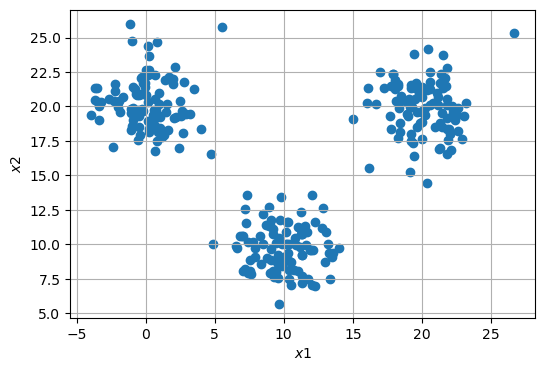

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(x[:,0], x[:,1])
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.grid()
plt.show()

In [6]:
help(hierarchy)

Help on module scipy.cluster.hierarchy in scipy.cluster:

NAME
    scipy.cluster.hierarchy

DESCRIPTION
    Hierarchical clustering (:mod:`scipy.cluster.hierarchy`)

    .. currentmodule:: scipy.cluster.hierarchy

    These functions cut hierarchical clusterings into flat clusterings
    or find the roots of the forest formed by a cut by providing the flat
    cluster ids of each observation.

    .. autosummary::
       :toctree: generated/

       fcluster
       fclusterdata
       leaders

    These are routines for agglomerative clustering.

    .. autosummary::
       :toctree: generated/

       linkage
       single
       complete
       average
       weighted
       centroid
       median
       ward

    These routines compute statistics on hierarchies.

    .. autosummary::
       :toctree: generated/

       cophenet
       from_mlab_linkage
       inconsistent
       maxinconsts
       maxdists
       maxRstat
       to_mlab_linkage

    Routines for visualizing flat clu

In [ ]:
help(hierarchy.linkage)

In [7]:
Z = hierarchy.linkage(x, metric='euclidean', method= 'ward')

In [8]:
len(Z)

299

In [9]:
pd.DataFrame(Z)

,0,1,2,3
0,69.0,94.0,0.020460,2.0
1,43.0,53.0,0.042133,2.0
2,17.0,71.0,0.059228,2.0
3,232.0,233.0,0.066203,2.0
4,210.0,288.0,0.067657,2.0
...,...,...,...,...
294,580.0,593.0,20.460512,100.0
295,590.0,592.0,20.477964,100.0
296,589.0,591.0,21.356080,100.0
297,594.0,596.0,143.716414,200.0


In [ ]:
help(hierarchy.dendrogram)

## Criterios de selección de grupos


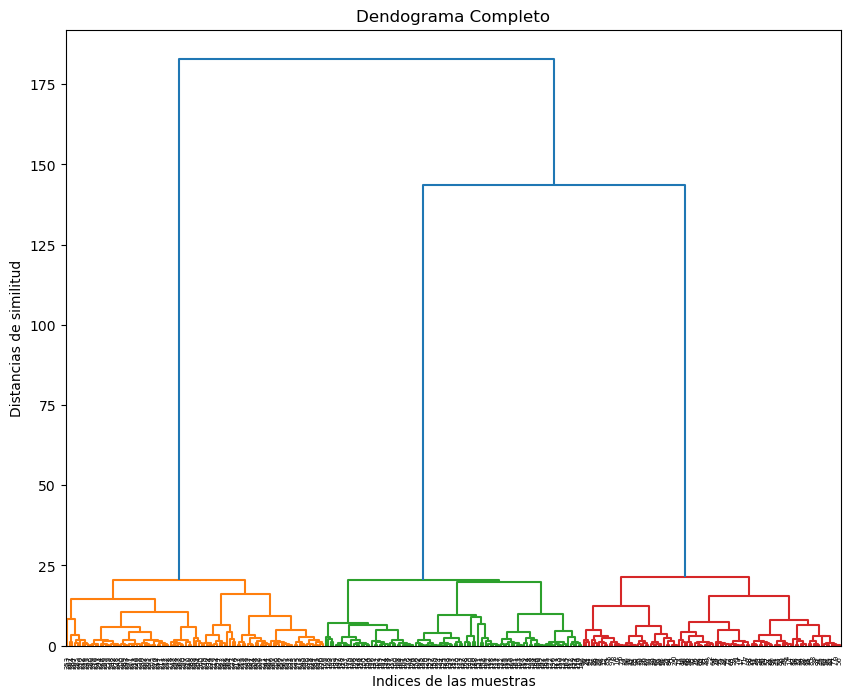

In [10]:
plt.figure(figsize=(10,8))
dn = hierarchy.dendrogram(Z)

plt.title('Dendograma Completo')
plt.xlabel('Indices de las muestras')
plt.ylabel('Distancias de similitud')
plt.show()

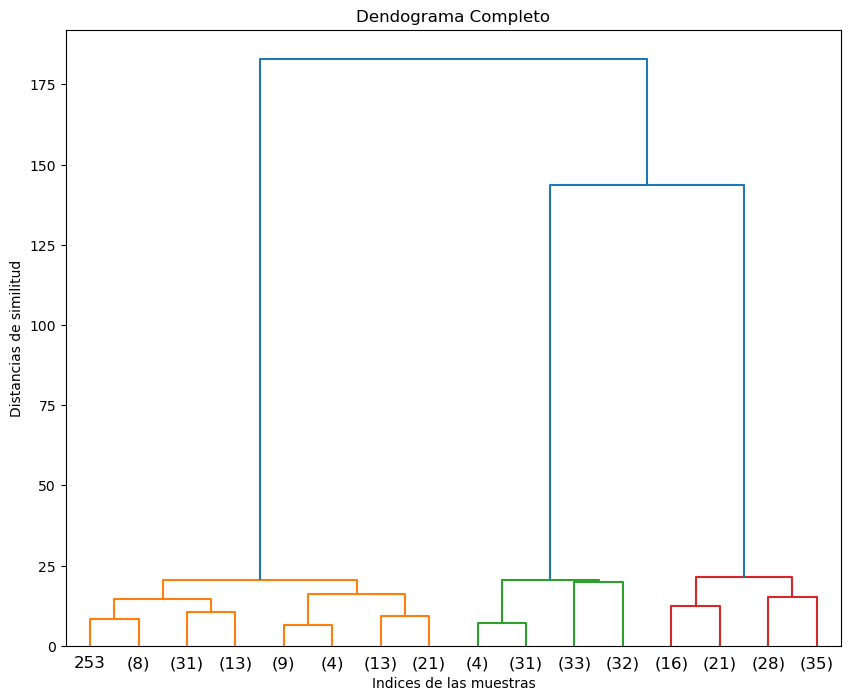

In [12]:
plt.figure(figsize=(10,8))
dn = hierarchy.dendrogram(Z, truncate_mode ='level', p=3)

plt.title('Dendograma Completo')
plt.xlabel('Indices de las muestras')
plt.ylabel('Distancias de similitud')
plt.show()

In [13]:
grupos_opt = 3
grupos_datos = hierarchy.fcluster(Z,grupos_opt, criterion='maxclust')
# Como tarea para investigar, qué hace el método fcluster ()
grupos_datos

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [14]:
len(grupos_datos)

300

In [15]:
X = pd.DataFrame(x, columns=['x1','x2'])
X['cluster'] = grupos_datos

In [16]:
X

,x1,x2,cluster
0,6.969317,10.593540,3
1,11.997117,9.562768,3
2,11.699697,10.890653,3
3,10.383094,8.146631,3
4,9.671784,10.441675,3
...,...,...,...
295,20.773926,20.257265,1
296,23.180579,20.241911,1
297,16.942595,22.507324,1
298,18.022381,21.292806,1


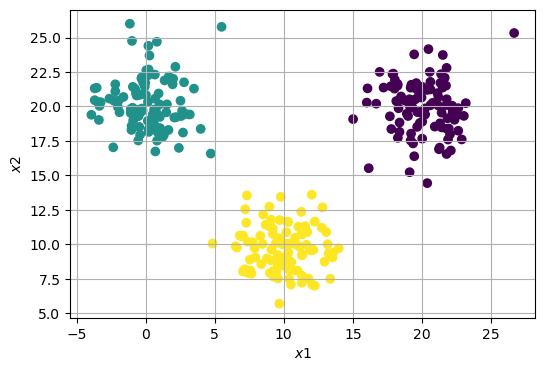

In [17]:
plt.figure(figsize=(6,4))
plt.scatter(X['x1'].values, X['x2'].values, c=X['cluster'].values)
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.grid()
plt.show()

### Criterio del Codo (1er criterio)


In [18]:
pd.DataFrame(Z)

,0,1,2,3
0,69.0,94.0,0.020460,2.0
1,43.0,53.0,0.042133,2.0
2,17.0,71.0,0.059228,2.0
3,232.0,233.0,0.066203,2.0
4,210.0,288.0,0.067657,2.0
...,...,...,...,...
294,580.0,593.0,20.460512,100.0
295,590.0,592.0,20.477964,100.0
296,589.0,591.0,21.356080,100.0
297,594.0,596.0,143.716414,200.0


In [19]:
last = Z[-15:,2]
last_rev = last[::-1]
indx_group = np.arange(1, len(last_rev)+1)
indx_group

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [20]:
last_rev

array([182.86850948, 143.71641399,  21.35608009,  20.47796381,
        20.46051219,  19.84674171,  15.96890863,  15.30645742,
        14.48568101,  12.37055415,  10.56564073,   9.82646649,
         9.65246249,   9.37006433,   9.05267121])

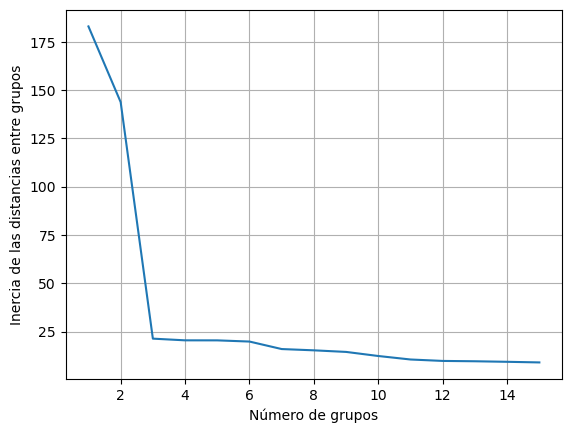

In [21]:
#Grafica del criterio del codo
plt.plot(indx_group, last_rev)
plt.xlabel('Número de grupos')
plt.ylabel('Inercia de las distancias entre grupos')
plt.grid()
plt.show()

In [22]:
#El número de grupos opt mediante el criterio del codo es 3
grupos_opt = 3
grupos_datos = hierarchy.fcluster(Z,grupos_opt, criterion='maxclust')
# Como tarea para investigar, qué hace el método fcluster ()
grupos_datos

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

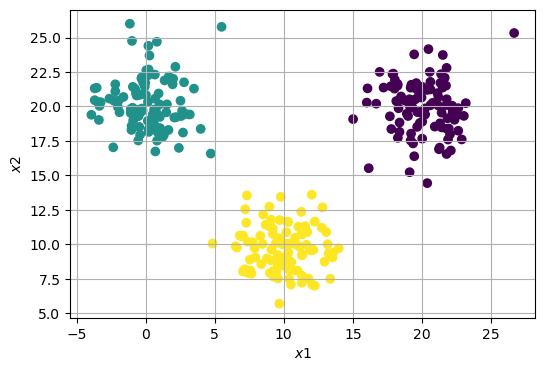

In [23]:
plt.figure(figsize=(6,4))
plt.scatter(X['x1'].values, X['x2'].values, c=X['cluster'].values)
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.grid()
plt.show()


In [24]:
def criterio_codo(Z, n_grupos):
    last = Z[-n_grupos:,2]
    last_rev = last[::-1]
    indx_group = np.arange(1,len(last_rev)+1)
    
    #Gráfica del codo
    plt.plot(indx_group, last_rev)
    plt.xlabel('Número de grupos')
    plt.ylabel('Inercia de las distancias entre grupos')
    plt.grid()
    plt.show()

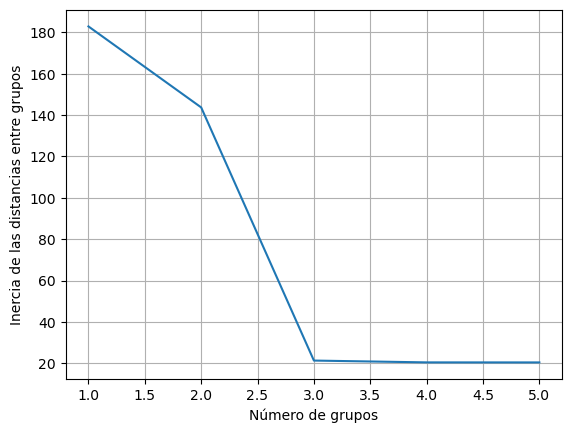

In [27]:
criterio_codo(Z, 5)

### Criterio del gradiente


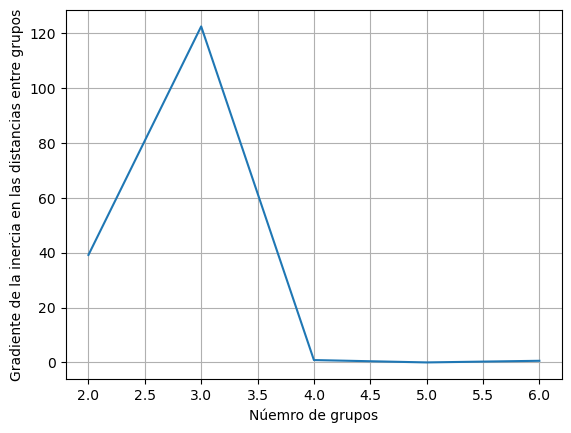

In [28]:
last = Z[-6:,2]
gradiente = np.diff(last)
grad_rev = gradiente[::-1]

indx_group = np.arange(2,len(grad_rev)+2)

#Graficar el criterio del gradiente
plt.plot(indx_group, grad_rev)
plt.xlabel('Núemro de grupos')
plt.ylabel('Gradiente de la inercia en las distancias entre grupos')
plt.grid()
plt.show()

In [29]:
def criterio_gradiente(Z, n_grupos):
    last = Z[-n_grupos:,2]
    gradiente = np.diff(last)
    grad_rev = gradiente[::-1]

    indx_group = np.arange(2,len(grad_rev)+2)

    #Graficar el criterio del gradiente
    plt.plot(indx_group, grad_rev)
    plt.xlabel('Número de grupos')
    plt.ylabel('Gradiente de la inercia en las distancias entre grupos')
    plt.grid()
    plt.show()

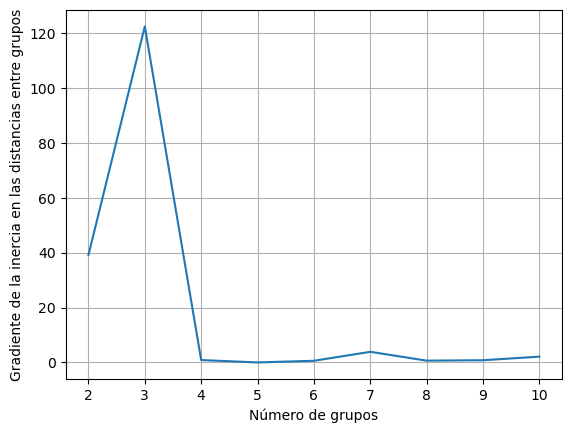

In [31]:
criterio_gradiente(Z, 10)

## Aplicar número de grupos opt

In [32]:
#El número de grupos opt mediante el criterio del codo es 3
grupos_opt = 3
grupos_datos = hierarchy.fcluster(Z,grupos_opt, criterion='maxclust')
# Como tarea para investigar, qué hace el método fcluster ()
grupos_datos

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

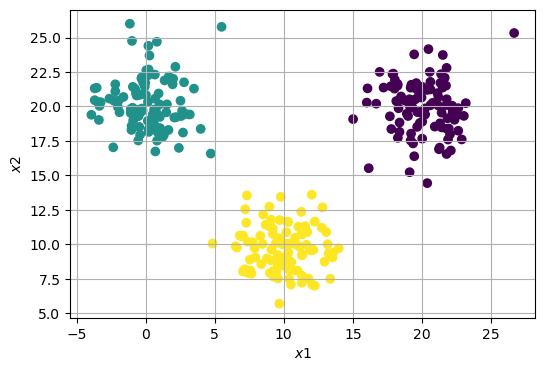

In [33]:
plt.figure(figsize=(6,4))
plt.scatter(X['x1'].values, X['x2'].values, c=X['cluster'].values)
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.grid()
plt.show()

## Ejemplo 2: 

Consideremos el datasety `shopping-data.csv`, este dataset contiene información sobre el ingreso anual y gastos de clientes de una empresa.

Conservaremos las columnas Ingresos anuales (en miles de dólares) y Puntuación de gastos (1-100). La columna Spending Score indica la frecuencia con la que una persona gasta dinero en un centro comercial en una escala del 1 al 100, siendo 100 el que más gasta.

In [34]:
data = pd.read_csv('shopping-data.csv')

In [35]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
data_split = data.iloc[:,-2:]

In [37]:
data_split.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [38]:
data_split.values

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

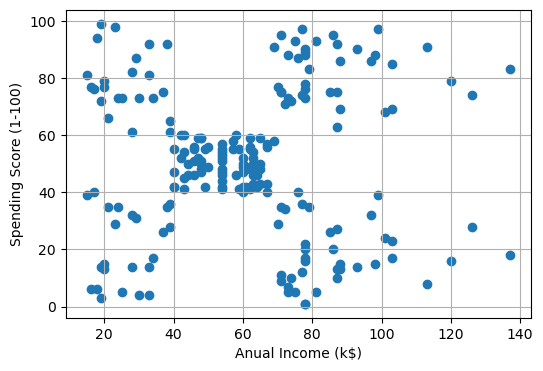

In [39]:
# Visualizar los datos Anual income vs Spending Score
plt.figure(figsize=(6,4))
plt.scatter(data_split.values[:,0],data_split.values[:,1])
plt.xlabel('Anual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()

In [ ]:
#Aplicar el clustering Jerárquico (Elegir el criterio de linkage, metrica de similitud)
#Decidir cuántos grupos seleccionar para la clusterización
# - Dendrogramna
# - C. codo
# - C. Gradiente
# Graficar los datos con la clusterización (con sus grupos correspondientes)


In [40]:
Z = hierarchy.linkage(data_split.values, metric='euclidean', method='ward')

In [41]:
pd.DataFrame(Z)

,0,1,2,3
0,65.0,68.0,0.000000,2.0
1,48.0,49.0,0.000000,2.0
2,156.0,158.0,0.000000,2.0
3,129.0,131.0,0.000000,2.0
4,21.0,23.0,1.000000,2.0
...,...,...,...,...
194,384.0,386.0,113.886017,32.0
195,391.0,392.0,245.654601,108.0
196,387.0,395.0,262.562634,129.0
197,393.0,394.0,394.859658,71.0


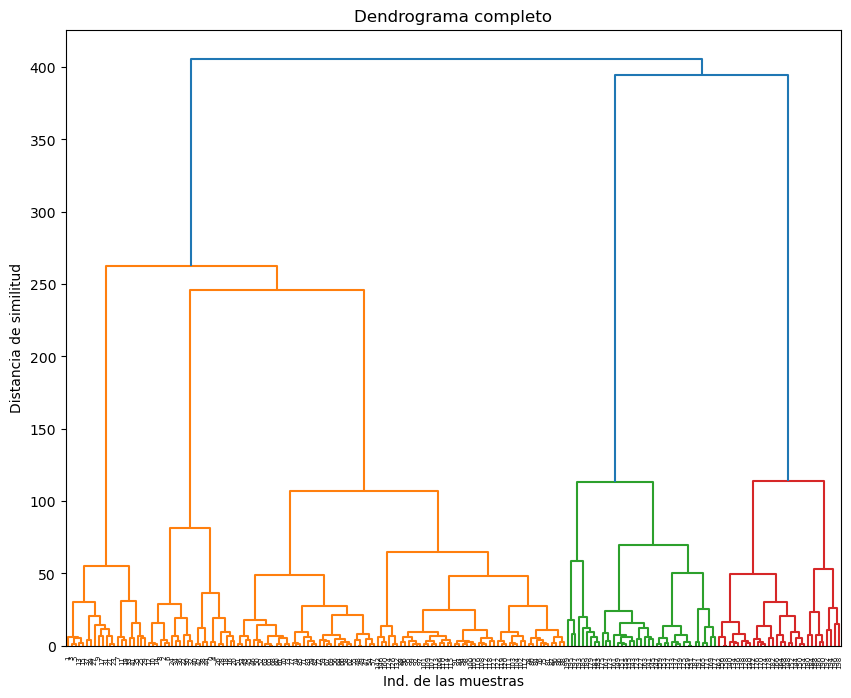

In [42]:
# Dendrograma
plt.figure(figsize=(10,8))
dn = hierarchy.dendrogram(Z)
plt.title('Dendrograma completo')
plt.xlabel('Ind. de las muestras')
plt.ylabel('Distancia de similitud')
plt.show()

In [ ]:
#Con el dendrograma de arriba se puede conlcuir que podemos agrupar con 5 grupos

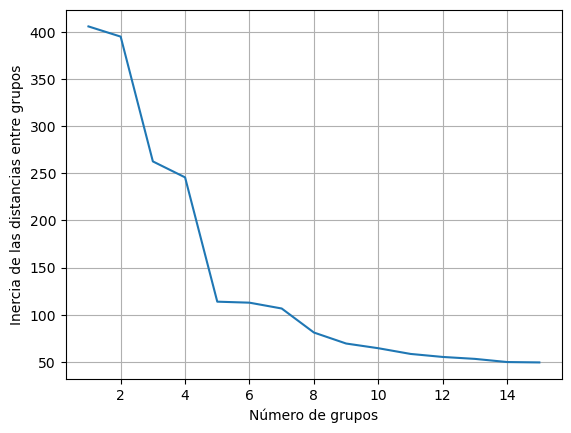

In [43]:
#Criterio del codo
criterio_codo(Z, 15)

In [ ]:
# Con el criterio del codo se puede concluir que tenemos 5 o 7 grupos

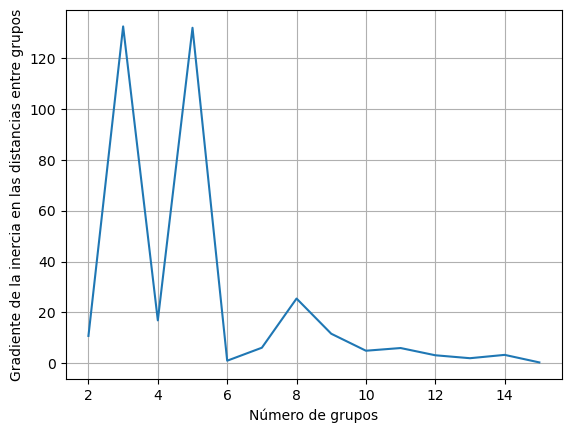

In [44]:
#Criterio del codo
criterio_gradiente(Z, 15)

In [ ]:
# Con el criterio del gradiente se puede observar que se puede clusterizar con 3, 5 o 7, 8

In [47]:
grup_opt =5
grupos_datos = hierarchy.fcluster(Z, grup_opt, criterion='maxclust')


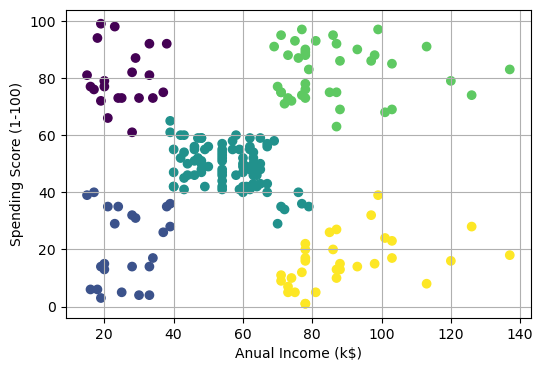

In [48]:
# Visualizar los datos Anual income vs Spending Score
plt.figure(figsize=(6,4))
plt.scatter(data_split.values[:,0],data_split.values[:,1], c=grupos_datos)
plt.xlabel('Anual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()

## Discretización de datos usando clustering jerárquico

**Procedimiento:**
1. Aplicar clustering jerárquico sobre la variable o variables de interés (puede ser univariado o multivariado).
2. Cortar el dendrograma en el número deseado de clusters (bins).
3. Asignar a cada dato la etiqueta de su cluster, que actúa como la categoría discreta.

#### Ejemplo: Discretización de una variable continua
Supongamos que queremos discretizar la variable `petal length (cm)` del dataset Iris en 4 categorías usando clustering jerárquico.

In [49]:
from sklearn.datasets import load_iris
# Cargar datos
iris = load_iris()
X = iris.data
labels = iris.target

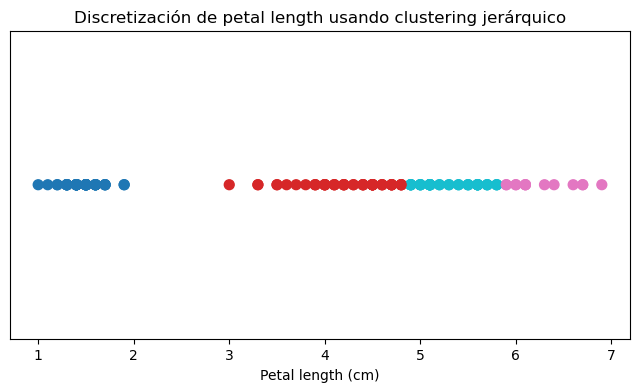

In [50]:
# Usar clustering jerárquico para discretizar petal length
petal_length = X[:, 2].reshape(-1, 1)
Z_petal = hierarchy.linkage(petal_length, method='ward')
petal_bins = hierarchy.fcluster(Z_petal, t=4, criterion='maxclust')

plt.figure(figsize=(8,4))
plt.scatter(petal_length, np.zeros_like(petal_length), c=petal_bins, cmap='tab10', s=50)
plt.xlabel('Petal length (cm)')
plt.yticks([])
plt.title('Discretización de petal length usando clustering jerárquico')
plt.show()



- La discretización jerárquica puede ser útil como preprocesamiento para modelos que funcionan bien con variables categóricas (árboles, Naive Bayes, reglas, etc.).
- Puede ayudar a capturar patrones no lineales o a reducir el sobreajuste en variables continuas con outliers.